# **ИМПОРТ нужных библиотек и классов**

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 28.97 MiB/s, done.
Resolving deltas: 100% (4201/4201), done.


In [ ]:
%cd keras-retinanet/

/content/keras-retinanet


In [ ]:
!pip install .

In [ ]:
!python setup.py build_ext --inplace

In [ ]:
#tensorflow & keras

import tensorflow as tf
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
import keras_resnet

from keras_retinanet import utils

from keras.layers.normalization import layer_normalization
from keras_retinanet.utils.gpu import setup_gpu
from keras_retinanet.utils import compute_overlap

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

In [ ]:
!pip install matplotlib-venn

In [4]:
!pip install xmljson

In [ ]:
!pip install easyimages

In [6]:
!pip install Pillow

In [ ]:

#установка Dask

!pip install dask-saturn dask==2.30.0 distributed==

In [ ]:
# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

In [ ]:
from os.path import exists

#git_repo_url = 'https://github.com/fizyr/keras-retinanet'
#retina_net_dir = 'keras-retinanet'

#if not exists(retina_net_dir):
#    # clone "depth 1" will only get the latest copy of the relevant files.
#    !git clone -q --recurse-submodules --depth 1 $git_repo_url
#    # build
#    !cd {retina_net_dir} && pip install .

In [23]:
import numpy as np 
import pandas as pd

import random
from tqdm import tqdm_notebook as tqdm # progress bar

from pprint import pprint
pd.set_option('display.max_columns', None)

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# библиотека для обработки даты, времени
import datetime as dt
import time
from datetime import datetime, date, time, timedelta

#
from tqdm.notebook import tqdm
import urllib
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Иструмент для кодирования
from sklearn.preprocessing import LabelEncoder
import re

# torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler

# torchvision
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

# sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели

# CV
import cv2

# Albumenatations
import albumentations as A

# Glob
from glob import glob

import warnings
warnings.filterwarnings('ignore')

# обработка изображений
from PIL import Image, ImageDraw
from ast import literal_eval

# работа с разными форматами датасетов
import xmljson
import xml.etree.ElementTree as ET

In [9]:
import pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x7efe6bd387d0>)

In [10]:
from easyimages import EasyImageList

In [11]:
from PIL import Image

In [ ]:
# установка библиотек Dask

from dask_saturn import SaturnCluster
from dask.distributed import Client

cluster = SaturnCluster()
client = Client(cluster)
client

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1c20_pLvDoKpsKVoP9uv_MaVqcUMDY7_qGJ8Fiq3k1cU/edit#gid=76902416'

In [ ]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') # Сначала мы превращаем в URL экспорта CSV

# **ЗАГРУЗКА датасета "Юрлица данные по договорам"**
(po_yur_dannie_po_dogovoru.csv)


In [12]:
# Загрузка датасета:

#data = pd.read_csv('4_po_yur_dannie_po_dogovoru.csv')
#data.info()

data = pd.read_csv('/content/drive/MyDrive/DS ninjas/ch.xackaton_po_yur_dannie_po_dogovoru.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208347 entries, 0 to 208346
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   208347 non-null  int64  
 1   finance_source_name  208347 non-null  object 
 2   msfo_group_name      208343 non-null  object 
 3   nds_is_valuable      208347 non-null  object 
 4   okved_name           202669 non-null  object 
 5   voltage              198749 non-null  object 
 6   user_subgroup        198749 non-null  object 
 7   eso_is_valuable      0 non-null       float64
 8   contract_type        198749 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.3+ MB


In [ ]:
data.shape

(201238, 9)

In [ ]:
data.sample(5)

In [13]:
data.isnull().sum()

id                          0
finance_source_name         0
msfo_group_name             4
nds_is_valuable             0
okved_name               5678
voltage                  9598
user_subgroup            9598
eso_is_valuable        208347
contract_type            9598
dtype: int64

In [14]:
data.okved_name.sort_values(ascending=True).describe()

count                                                202669
unique                                                 1768
top       Аренда и управление собственным или арендованн...
freq                                                  39687
Name: okved_name, dtype: object

In [15]:
data.finance_source_name.value_counts()

самостоятельное финансирование                        187337
районный или гор.бюджет М.О.                            6668
федер.бюджет                                            4775
бюджет г.Москвы (гор.подчинение)                        4380
бюджет М.О.                                             1621
иные виды финансирования                                1332
бюджет админ.окр.г.Москвы                               1186
(не определено)                                          514
коммерческие организации                                 368
бюджет муниц.окр.г.Москвы                                114
органы местного самоуправления и организации (м/б)        25
органы исполнительной власти субъектов РФ(обл.бюд)        14
федеральные органы исполнительной власти                  13
Name: finance_source_name, dtype: int64

In [16]:
data.msfo_group_name.value_counts()

Прочие потребители                          165901
Управляющие организации, ТСЖ, ЖСК,ЖК         13100
Городской/ Местный бюджет                    12298
Промышленность                                5599
Федеральный бюджет                            4722
Сельское  хозяйство                           2309
Прочее (котельные, водоканалы и др.)          1922
Областной/ Краевой бюджет                     1587
Энергосбытовые компании (ЭСК, ГП 2, ОПП)       878
РЖД                                             22
Население (на прямых расчетах)                   5
Name: msfo_group_name, dtype: int64

In [17]:
data.nds_is_valuable.value_counts() # признак для удаления!

1,0    208279
0,0        68
Name: nds_is_valuable, dtype: int64

In [18]:
data.okved_name.value_counts()

Аренда и управление собственным или арендованным недвижимым имуществом                                                           39687
Аренда и управление собственным или арендованным нежилым недвижимым имуществом                                                   13441
Управление эксплуатацией жилого фонда за вознаграждение или на договорной основе                                                 11255
Управление эксплуатацией нежилого фонда за вознаграждение или на договорной основе                                               10450
Управление недвижимым имуществом за вознаграждение или на договорной основе                                                       8802
                                                                                                                                 ...  
Производство вязаных и трикотажных чулочно-носочных изделий, кроме изготовленных по индивидуальному заказу                           1
 Производство кинофильмов, видеофильмов и телевизионных

In [19]:
data.voltage.value_counts()

НН                 127709
СН2                 65451
ВН                   5114
СН1                   461
(не определено)        11
ГН,ВН                   3
Name: voltage, dtype: int64

In [20]:
data.user_subgroup.value_counts()

Непромышленные потребители                                  157929
Населенные пункты                                            25250
Пром.предприятия с установленной мощностью до 750 кВА         9581
Пром.предприятия с установленной мощностью свыше 750 кВА      2536
Производственные сельхозпотребители                           2010
Оптовые потребители-перепродавцы                               702
Население                                                      626
Хозяйственный нужды Энергосистемы                               58
Электрифицированный железнодорожный транспорт                   26
Электрифицированный городской транспорт                         19
(не определено)                                                 12
Name: user_subgroup, dtype: int64

In [24]:
data.eso_is_valuable.value_counts() # признак для удаления!

Series([], Name: eso_is_valuable, dtype: int64)

In [25]:
data.contract_type.value_counts() # признак для удаления!

Энергоснабжения    198403
Купли-продажи         346
Name: contract_type, dtype: int64

In [22]:
# копия датасета 4_po_yur_dannie_po_dogovoru.csv признаки

data_4_copy=data.copy(deep=True)

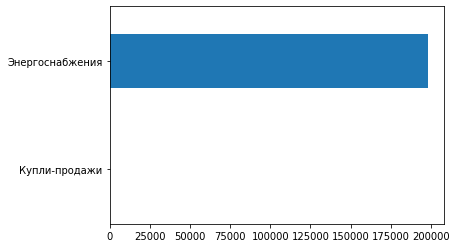

In [24]:
# распределение признака contract_type
data['contract_type'].value_counts(ascending=True).plot(kind='barh')

**ЗДЕСЬ ВЫГРУЖАЕТСЯ ДАТАСЕТ**

**po_yur_dannie_po_dogovoru**

УДАЛИТЬ из ДАТАСЕТА 4_po_yur_dannie_po_dogovoru.csv признаки:

- nds_is_valuable
- eso_is_valuable
- contract_type

In [25]:
# удаление признаков из датасета 4_po_yur_dannie_po_dogovoru.csv признаки

df_preEDA=data.drop(["nds_is_valuable","eso_is_valuable","contract_type"], axis=1)

In [26]:
# Запись датасета 4_po_yur_dannie_po_dogovoru.csv:

df_preEDA.to_csv('preEDA_po_yur_dannie_po_dogovoru', sep='\t')

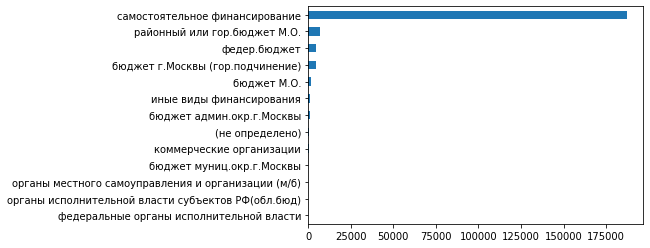

In [27]:
# распределение признака finance_source_name
df_preEDA['finance_source_name'].value_counts(ascending=True).plot(kind='barh')

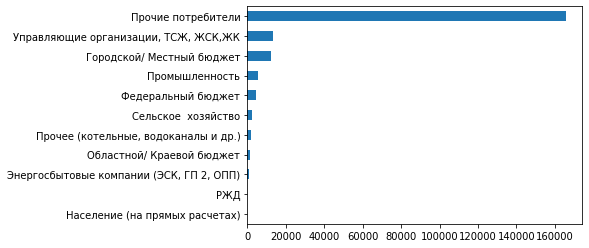

In [28]:
# распределение признака msfo_group_name
df_preEDA['msfo_group_name'].value_counts(ascending=True).plot(kind='barh')

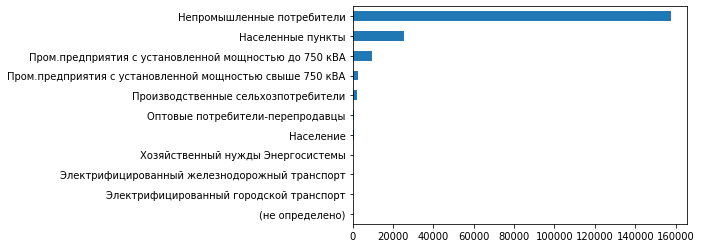

In [29]:
# распределение признака user_subgroup
df_preEDA['user_subgroup'].value_counts(ascending=True).plot(kind='barh')

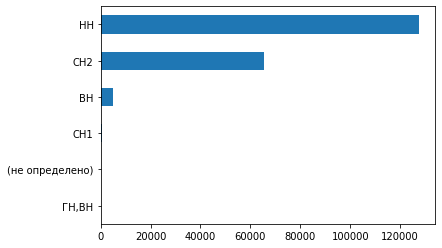

In [30]:
# распределение признака voltage
df_preEDA['voltage'].value_counts(ascending=True).plot(kind='barh')

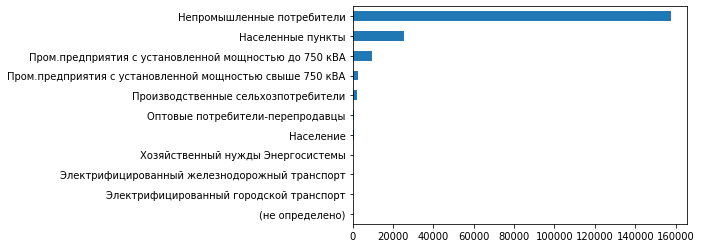

In [31]:
# распределение признака user_subgroup 
df_preEDA['user_subgroup'].value_counts(ascending=True).plot(kind='barh')

# **ЗАГРУЗКА датасета "Юрлица начисления 2019-2021"**

In [32]:
# Загрузка датасета:

data_5 = pd.read_csv('/content/drive/MyDrive/DS ninjas/ch.xackaton_po_yur_litsa_nachisleniya_2019_2021.csv')
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153127 entries, 0 to 5153126
Data columns (total 16 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   month_year                         float64
 1   id                                 int64  
 2   price_category                     int64  
 3   max_power_range                    object 
 4   calc_algorithm                     object 
 5   cost_of_taken_energy_with_nds_rub  float64
 6   unaccounted_energy_usage_kVt       int64  
 7   unaccounted_energy_usage_rub       float64
 8   power_capacity_kVt                 int64  
 9   power_capacity_with_nds_rub        float64
 10  unaccounted_power_usage_kVt        int64  
 11  unaccounted_power_usage_rub        int64  
 12  ore_price_with_nds_rub             float64
 13  used_energy_capacity_kVth          int64  
 14  voltage                            object 
 15  ore_price_kVt                      int64  
dtypes: float64(5), int

In [ ]:
data_5.shape

(5153127, 16)

In [ ]:
data_5.sample(3)

,month_year,id,price_category,max_power_range,calc_algorithm,cost_of_taken_energy_with_nds_rub,unaccounted_energy_usage_kVt,unaccounted_energy_usage_rub,power_capacity_kVt,power_capacity_with_nds_rub,unaccounted_power_usage_kVt,unaccounted_power_usage_rub,ore_price_with_nds_rub,used_energy_capacity_kVth,voltage,ore_price_kVt
2262814,2020.12,31201842,4,От 150 до 670 кВт,Алгоритм расчета: не производится,0.00,0,0.0,28,28345.7,0,0,44060.4,0,НН,30
1139307,2019.12,187516098,1,Менее 150 кВт,Алгоритм расчета: по показаниям,4639.72,0,0.0,0,0.0,0,0,0.0,670,НН,0
4088945,2020.07,299672301,0,NaN,NaN,0.00,0,0.0,0,0.0,0,0,0.0,0,NaN,0


In [33]:
data_5.isna().sum()

month_year                                 0
id                                         0
price_category                             0
max_power_range                      1180821
calc_algorithm                       1180821
cost_of_taken_energy_with_nds_rub          0
unaccounted_energy_usage_kVt               0
unaccounted_energy_usage_rub               0
power_capacity_kVt                         0
power_capacity_with_nds_rub                0
unaccounted_power_usage_kVt                0
unaccounted_power_usage_rub                0
ore_price_with_nds_rub                     0
used_energy_capacity_kVth                  0
voltage                              1180820
ore_price_kVt                              0
dtype: int64

In [34]:
data_5.max_power_range.isna().sum()

1180821

In [35]:
# копия датасета data_5
data_5_red=data_5.copy(deep=True)

In [36]:
# удаляем 1180821 запись

data_5_red.dropna(subset=['max_power_range'], how='all', inplace=True)

In [49]:
data_5_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972306 entries, 4 to 5153126
Data columns (total 16 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   month_year                         float64
 1   id                                 int64  
 2   price_category                     int64  
 3   max_power_range                    object 
 4   calc_algorithm                     object 
 5   cost_of_taken_energy_with_nds_rub  float64
 6   unaccounted_energy_usage_kVt       int64  
 7   unaccounted_energy_usage_rub       float64
 8   power_capacity_kVt                 int64  
 9   power_capacity_with_nds_rub        float64
 10  unaccounted_power_usage_kVt        int64  
 11  unaccounted_power_usage_rub        int64  
 12  ore_price_with_nds_rub             float64
 13  used_energy_capacity_kVth          int64  
 14  voltage                            object 
 15  ore_price_kVt                      int64  
dtypes: float64(5), int

In [37]:
data_5_red.isna().sum()

month_year                           0
id                                   0
price_category                       0
max_power_range                      0
calc_algorithm                       0
cost_of_taken_energy_with_nds_rub    0
unaccounted_energy_usage_kVt         0
unaccounted_energy_usage_rub         0
power_capacity_kVt                   0
power_capacity_with_nds_rub          0
unaccounted_power_usage_kVt          0
unaccounted_power_usage_rub          0
ore_price_with_nds_rub               0
used_energy_capacity_kVth            0
voltage                              0
ore_price_kVt                        0
dtype: int64

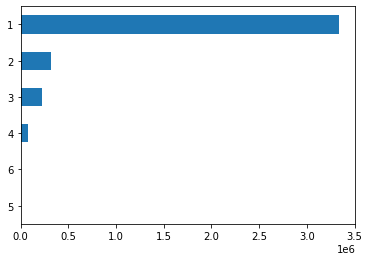

In [38]:
# распределение признака price_category
data_5_red['price_category'].value_counts(ascending=True).plot(kind='barh')

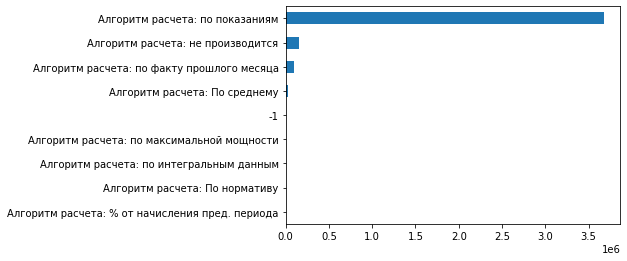

In [39]:
# распределение признака calc_algorithm
data_5_red['calc_algorithm'].value_counts(ascending=True).plot(kind='barh')

In [40]:
# распределение признака cost_of_taken_energy_with_nds_rub
data_5_red.cost_of_taken_energy_with_nds_rub.value_counts()

0.00         154020
438.30         2641
418.50         2187
876.60         1694
837.00         1312
              ...  
7445.16           1
294658.56         1
87732.59          1
8224.37           1
14673.31          1
Name: cost_of_taken_energy_with_nds_rub, Length: 1807646, dtype: int64

In [41]:
data_5_red.loc[data_5_red['cost_of_taken_energy_with_nds_rub'] > 0].value_counts()

month_year  id         price_category  max_power_range      calc_algorithm                   cost_of_taken_energy_with_nds_rub  unaccounted_energy_usage_kVt  unaccounted_energy_usage_rub  power_capacity_kVt  power_capacity_with_nds_rub  unaccounted_power_usage_kVt  unaccounted_power_usage_rub  ore_price_with_nds_rub  used_energy_capacity_kVth  voltage  ore_price_kVt
2020.05     299439312  2               Менее 150 кВт        Алгоритм расчета: по показаниям  24362.71                           0                             0.0                           0                   0.0                          0                            0                            0.0                     3959                       НН       0                2
            299395701  3               От 670 кВт до 10МВт  Алгоритм расчета: по показаниям  413875.56                          0                             0.0                           0                   0.0                          0                   

In [42]:
data_5_red.unaccounted_energy_usage_kVt.value_counts()

 0         3971642
 35640           2
 2946            2
 51892           2
 5506            2
            ...   
 64872           1
-867120          1
 64881           1
 116052          1
 35845           1
Name: unaccounted_energy_usage_kVt, Length: 656, dtype: int64

In [ ]:
data_5_red.unaccounted_energy_usage_rub.value_counts()

In [ ]:
data_5_red.power_capacity_kVt.value_counts()

In [ ]:
data_5_red.power_capacity_with_nds_rub.value_counts()

In [ ]:
data_5_red.unaccounted_power_usage_kVt.value_counts()

In [ ]:
data_5_red.unaccounted_power_usage_rub.value_counts()

In [ ]:
data_5_red.ore_price_with_nds_rub.value_counts()

In [ ]:
data_5_red.ore_price_kVt.value_counts()

In [ ]:
data_5_red.power_capacity_kVt.value_counts()

In [ ]:
data_5_red.power_capacity_with_nds_rub.value_counts()

**ЗДЕСЬ формируем датасет без отдельных признаков:**

удаляем:

- unaccounted_energy_usage_kVt
- unaccounted_energy_usage_rub
- unaccounted_power_usage_kVt
- unaccounted_power_usage_rub
- ore_price_with_nds_rub
- ore_price_kVt

In [43]:
data_5_preEDA=data_5_red[["month_year","id","price_category","max_power_range",
               "calc_algorithm","cost_of_taken_energy_with_nds_rub",
               "power_capacity_kVt","power_capacity_with_nds_rub",
               "used_energy_capacity_kVth","voltage"]]

In [44]:
data_5_preEDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972306 entries, 4 to 5153126
Data columns (total 10 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   month_year                         float64
 1   id                                 int64  
 2   price_category                     int64  
 3   max_power_range                    object 
 4   calc_algorithm                     object 
 5   cost_of_taken_energy_with_nds_rub  float64
 6   power_capacity_kVt                 int64  
 7   power_capacity_with_nds_rub        float64
 8   used_energy_capacity_kVth          int64  
 9   voltage                            object 
dtypes: float64(3), int64(4), object(3)
memory usage: 333.4+ MB


In [45]:
# распределение признака price_category
data_5_preEDA.loc[data_5_red['price_category']==5].value_counts()

month_year  id         price_category  max_power_range      calc_algorithm                     cost_of_taken_energy_with_nds_rub  power_capacity_kVt  power_capacity_with_nds_rub  used_energy_capacity_kVth  voltage
2021.09     183485133  5               Свыше 10МВт          Алгоритм расчета: по показаниям     1565106.60                        0                   0.0                          405973                     ВН         1
2020.07     183386733  5               Свыше 10МВт          Алгоритм расчета: не производится   0.00                              10520               11128082.0                   0                          ВН         1
                                                            -1                                 -81156.65                          0                   0.0                          793                        ВН         1
            105242103  5               Свыше 10МВт          Алгоритм расчета: по показаниям     23913360.00                      

In [46]:
# распределение признака price_category
data_5_preEDA.loc[data_5_red['price_category']==6].value_counts()

month_year  id         price_category  max_power_range      calc_algorithm                     cost_of_taken_energy_with_nds_rub  power_capacity_kVt  power_capacity_with_nds_rub  used_energy_capacity_kVth  voltage
2021.09     286541403  6               Свыше 10МВт          Алгоритм расчета: по показаниям    112200370.0                        0                   0.0                          53764016                   ВН         1
2020.06     256568742  6               От 670 кВт до 10МВт  Алгоритм расчета: по показаниям    538330.7                           0                   0.0                          258448                     СН2        1
            256531842  6               От 670 кВт до 10МВт  Алгоритм расчета: не производится  0.0                                914                 1022009.5                    0                          СН2        1
                                                                                                                                 

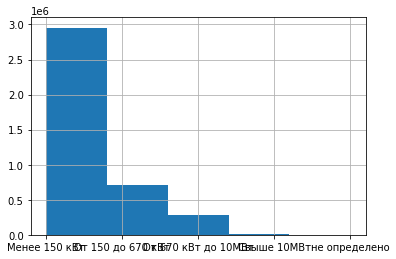

In [47]:
# распределение max_power_range по категориям
data_5_preEDA['max_power_range'].hist(bins=5)

In [48]:
# распределение признака max_power_range
data_5_preEDA.max_power_range.value_counts()

Менее 150 кВт          2953341
От 150 до 670 кВт       717020
От 670 кВт до 10МВт     287699
Свыше 10МВт              14214
не определено               32
Name: max_power_range, dtype: int64

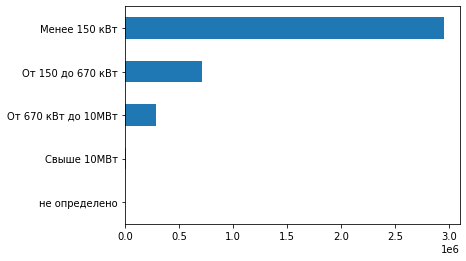

In [49]:
# распределение признака max_power_range
data_5_preEDA['max_power_range'].value_counts(ascending=True).plot(kind='barh')

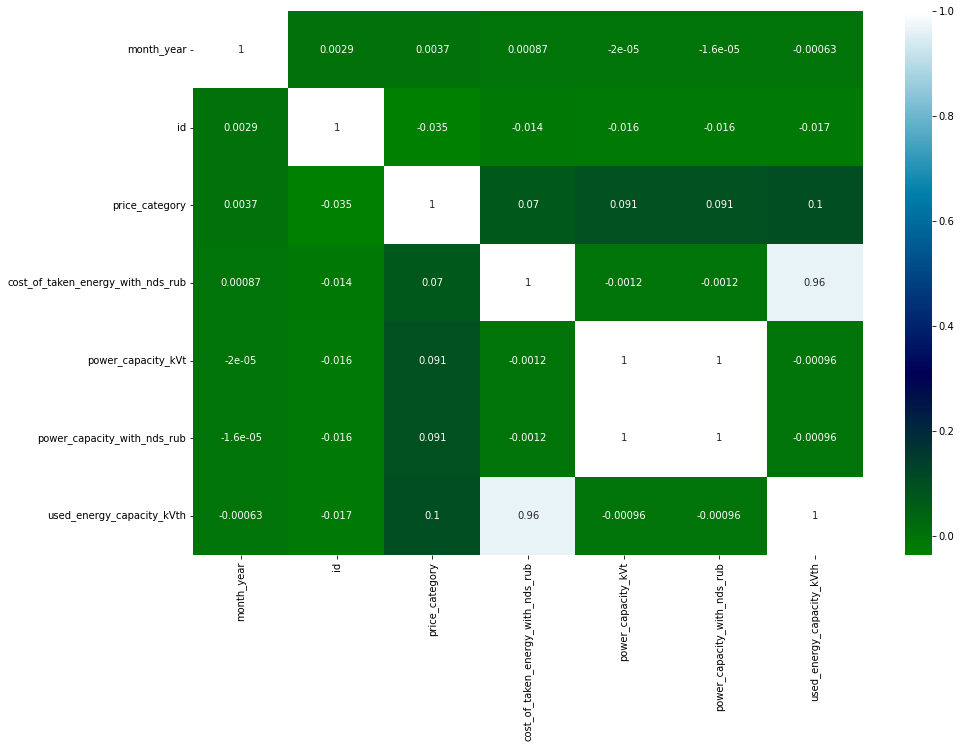

In [50]:
# тепловая карта
sns.heatmap(data_5_preEDA.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

**ЗДЕСЬ ВЫГРУЖАЕТСЯ ДАТАСЕТ**

**po_yur_litsa_nachisleniya_2019_2021**

In [51]:
# Запись датасета 5_po_yur_litsa_nachisleniya_2019_2021.csv:

data_5_preEDA.to_csv('preEDA_po_yur_litsa_nachisleniya_2019_2021', sep='\t')

# **ЗАГРУЗКА датасета "Юрлица полезный отпуск 2019-2021"**

In [52]:
# Загрузка датасета po_yur_poleznii_otpusk_2019_2021:

data_6 = pd.read_csv('/content/drive/MyDrive/DS ninjas/ch.xackaton_po_yur_poleznii_otpusk_2019_2021.csv',nrows=5000000)
data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 9 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   month_year                         float64
 1   registration_date                  object 
 2   hour                               int64  
 3   id                                 int64  
 4   price_category                     int64  
 5   calc_algorithm                     object 
 6   voltage                            object 
 7   energy_taken_kVth                  float64
 8   cost_of_taken_energy_with_nds_rub  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 343.3+ MB


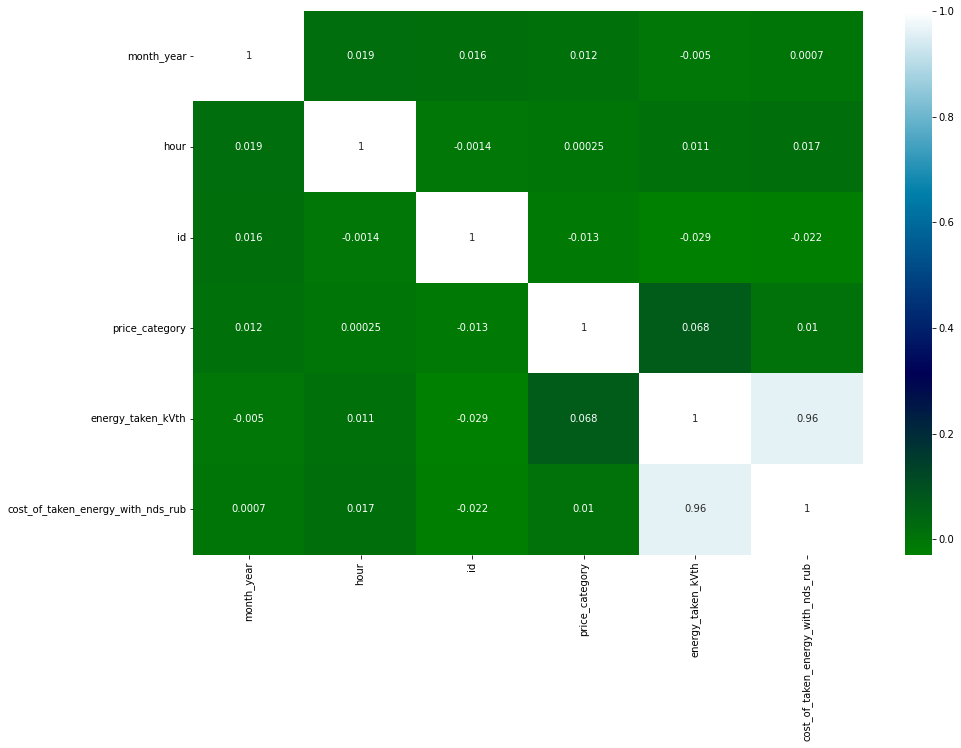

In [53]:
# тепловая карта
sns.heatmap(data_6.corr(), annot=True, cmap='ocean')
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [ ]:
data_6.sample(4)

In [ ]:
data_6.price_category.value_counts()

In [ ]:
data_6.price_category.value_counts()

In [ ]:
data_6.calc_algorithm.value_counts()

In [ ]:
data_6.voltage.value_counts()

In [ ]:
data_6.energy_taken_kVth.sort_values(ascending=True).value_counts()

In [ ]:
data_6.cost_of_taken_energy_with_nds_rub.value_counts()

In [ ]:
# распределение cost_of_taken_energy_with_nds_rub по категориям
fig, ax = plt.subplots(figsize = (10, 8))
bar_plot = sns.barplot(x='energy_taken_kVth', y='cost_of_taken_energy_with_nds_rub', data=data_6, alpha=0.8, ci=None)
for ytick in bar_plot.get_yticks():
        bar_plot.text(data_6.iloc[ytick][1]+0.005, ytick+0.2, str(round(data_6.iloc[ytick][1]*100,2))+' %', 
                    horizontalalignment='center',size=10, color='black',weight='semibold')
plt.title('Относительное количество пропусков')
plt.ylabel('')
plt.xlabel('Percent', fontsize=12)
plt.show()

**ЗДЕСЬ ВЫГРУЖАЕТСЯ ДАТАСЕТ**

**po_yur_poleznii_otpusk_2019_2021**

In [55]:
# копия датасета data_6
data_6_red=data_6.copy(deep=True)

**УДАЛЯЕМ признаки:**
- registration_date
- hour

In [56]:
data_6_preEDA=data_6_red[["month_year","id","price_category",
               "calc_algorithm","voltage",
               "energy_taken_kVth","cost_of_taken_energy_with_nds_rub"]]

In [57]:
# Запись датасета 6_po_yur_poleznii_otpusk_2019_2021.csv:

data_6_preEDA.to_csv('preEDA_po_yur_poleznii_otpusk_2019_2021', sep='\t')

# **EDA для датасета** "Юрлица данные по договорам" preEDA_po_yur_dannie_po_dogovoru

In [58]:
df_preEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208347 entries, 0 to 208346
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   208347 non-null  int64 
 1   finance_source_name  208347 non-null  object
 2   msfo_group_name      208343 non-null  object
 3   okved_name           202669 non-null  object
 4   voltage              198749 non-null  object
 5   user_subgroup        198749 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.5+ MB


In [59]:
df_preEDA.voltage.sort_values(ascending=True)

2915      (не определено)
2869      (не определено)
3388      (не определено)
149363    (не определено)
3203      (не определено)
               ...       
207964                NaN
208012                NaN
208021                NaN
208060                NaN
208154                NaN
Name: voltage, Length: 208347, dtype: object

In [60]:
df_preEDA.voltage.fillna(value='(не определено)', inplace=True)

In [61]:
df_preEDA.voltage.sort_values(ascending=True)

181092    (не определено)
29189     (не определено)
163090    (не определено)
85228     (не определено)
85229     (не определено)
               ...       
106084                СН2
106082                СН2
106081                СН2
106074                СН2
208346                СН2
Name: voltage, Length: 208347, dtype: object

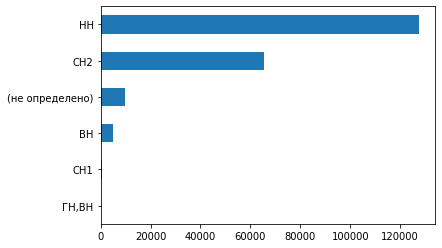

In [62]:
df_preEDA['voltage'].value_counts(ascending=True).plot(kind='barh')

In [63]:
df_preEDA['voltage'].value_counts().head(7)

НН                 127709
СН2                 65451
(не определено)      9609
ВН                   5114
СН1                   461
ГН,ВН                   3
Name: voltage, dtype: int64

In [65]:
# справочник уровня напряжения

df_preEDA["voltage"]=df_preEDA["voltage"].astype('category')
ClassDcn={"НН":1, "СН2":2, "ВН":3, "СН1":4, "ГН,ВН":5, "(не определено)":6}
df_preEDA["Class_Voltage"]=df_preEDA["voltage"].map(ClassDcn)
df_preEDA["Class_Voltage"]=df_preEDA["Class_Voltage"].astype("int64")

- (1) низкое напряжение (НН) - объекты электросетевого хозяйства (ниже 1 кВ)
- (2) высокое напряжение (ВН) - объекты электросетевого хозяйства (110 кВ и выше);
- (3) среднее первое напряжение (СН1) - объекты электросетевого хозяйства (35 кВ);
- (4) среднее второе напряжение (СН2) - объекты электросетевого хозяйства (20 - 1 кВ);
- (5) генераторное напряжение (ГН) - для потребителей, присоединенных к шинам производителей электрической энергии и мощности (генераторов); потребитель при расчетах с поставщиком электроэнергии имеет право выбора только 4 ценовой категории или 6 ценовой категории

In [66]:
df_preEDA['msfo_group_name'].value_counts().head(11)

Прочие потребители                          165901
Управляющие организации, ТСЖ, ЖСК,ЖК         13100
Городской/ Местный бюджет                    12298
Промышленность                                5599
Федеральный бюджет                            4722
Сельское  хозяйство                           2309
Прочее (котельные, водоканалы и др.)          1922
Областной/ Краевой бюджет                     1587
Энергосбытовые компании (ЭСК, ГП 2, ОПП)       878
РЖД                                             22
Население (на прямых расчетах)                   5
Name: msfo_group_name, dtype: int64

In [67]:
df_preEDA.user_subgroup.fillna(value='(не определено)', inplace=True)

In [68]:
df_preEDA.loc[df_preEDA['msfo_group_name']=='РЖД'].value_counts()

id         finance_source_name             msfo_group_name  okved_name                                                                                      voltage          user_subgroup                                          Class_Voltage
271236870  самостоятельное финансирование  РЖД              Деятельность железнодорожного транспорта: междугородные и международные пассажирские перевозки  ВН               Населенные пункты                                      3                1
105282453  самостоятельное финансирование  РЖД              Передача электроэнергии и технологическое присоединение к распределительным электросетям        СН2              Пром.предприятия с установленной мощностью до 750 кВА  2                1
105000327  самостоятельное финансирование  РЖД              Деятельность железнодорожного транспорта: междугородные и международные пассажирские перевозки  ВН               Непромышленные потребители                             3                1
                 

In [80]:
df_preEDA.msfo_group_name.fillna(value='(не определено)', inplace=True)

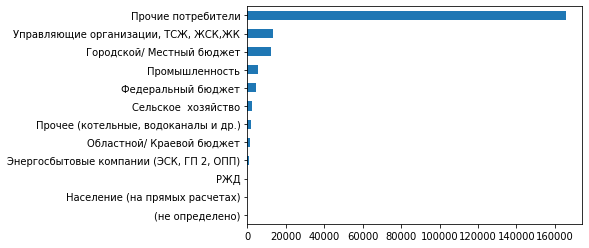

In [81]:
# распределение признака price_category
df_preEDA['msfo_group_name'].value_counts(ascending=True).plot(kind='barh')

In [84]:
df_preEDA['msfo_group_name'].value_counts().head(12)

Прочие потребители                          165901
Управляющие организации, ТСЖ, ЖСК,ЖК         13100
Городской/ Местный бюджет                    12298
Промышленность                                5599
Федеральный бюджет                            4722
Сельское  хозяйство                           2309
Прочее (котельные, водоканалы и др.)          1922
Областной/ Краевой бюджет                     1587
Энергосбытовые компании (ЭСК, ГП 2, ОПП)       878
РЖД                                             22
Население (на прямых расчетах)                   5
(не определено)                                  4
Name: msfo_group_name, dtype: int64

In [95]:
df_preEDA.okved_name.fillna(value='(не определено)', inplace=True)

In [105]:
df_preEDA['okved_name'].value_counts().head()


Аренда и управление собственным или арендованным недвижимым имуществом                39687
Аренда и управление собственным или арендованным нежилым недвижимым имуществом        13441
Управление эксплуатацией жилого фонда за вознаграждение или на договорной основе      11255
Управление эксплуатацией нежилого фонда за вознаграждение или на договорной основе    10450
Управление недвижимым имуществом за вознаграждение или на договорной основе            8802
Name: okved_name, dtype: int64

In [106]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
df_preEDA = pd.get_dummies(df_preEDA, columns=['voltage',], dummy_na=True)

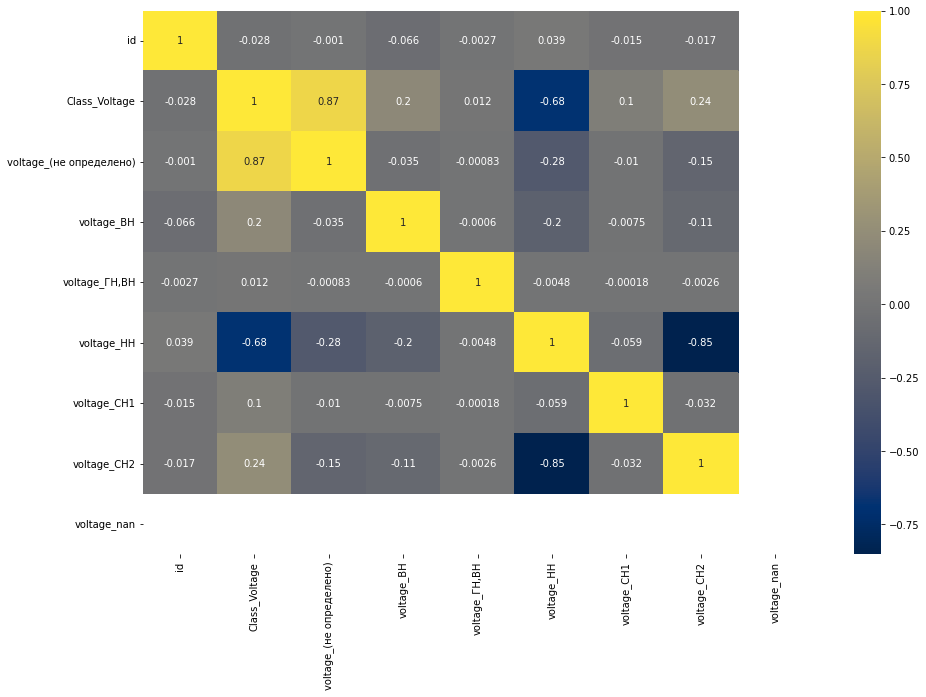

In [115]:
# тепловая карта
sns.heatmap(df_preEDA.corr(), annot=True, cmap='cividis')
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [107]:
df_preEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208347 entries, 0 to 208346
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       208347 non-null  int64 
 1   finance_source_name      208347 non-null  object
 2   msfo_group_name          208347 non-null  object
 3   okved_name               208347 non-null  object
 4   user_subgroup            208347 non-null  object
 5   Class_Voltage            208347 non-null  int64 
 6   voltage_(не определено)  208347 non-null  uint8 
 7   voltage_ВН               208347 non-null  uint8 
 8   voltage_ГН,ВН            208347 non-null  uint8 
 9   voltage_НН               208347 non-null  uint8 
 10  voltage_СН1              208347 non-null  uint8 
 11  voltage_СН2              208347 non-null  uint8 
 12  voltage_nan              208347 non-null  uint8 
dtypes: int64(2), object(4), uint8(7)
memory usage: 10.9+ MB


In [118]:
#сохраняем датасет без признаков:
## finance_source_name
## user_subgroup
## voltage_(не определено)
## voltage_nan
## 

df_preEDA_final=df_preEDA[["id","msfo_group_name","okved_name",
               "Class_Voltage","voltage_ВН", "voltage_ГН,ВН", "voltage_НН",
               "voltage_СН1","voltage_СН2"]]

In [119]:
# Запись датасета 4_po_yur_dannie_po_dogovoru.csv:

df_preEDA_final.to_csv('preEDA_final_po_yur_dannie_po_dogovoru', sep='\t')

# **EDA для датасета** "Юрлица начисления 2019-2021" data_5_preEDA_po_yur_litsa_nachisleniya_2019_2021

In [120]:
data_5_preEDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972306 entries, 4 to 5153126
Data columns (total 10 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   month_year                         float64
 1   id                                 int64  
 2   price_category                     int64  
 3   max_power_range                    object 
 4   calc_algorithm                     object 
 5   cost_of_taken_energy_with_nds_rub  float64
 6   power_capacity_kVt                 int64  
 7   power_capacity_with_nds_rub        float64
 8   used_energy_capacity_kVth          int64  
 9   voltage                            object 
dtypes: float64(3), int64(4), object(3)
memory usage: 333.4+ MB


In [122]:
data_5_preEDA.voltage.sort_values(ascending=True)

2893792     ВН
1184565     ВН
4809626     ВН
250046      ВН
989001      ВН
          ... 
1699634    СН2
3801652    СН2
3801651    СН2
3801649    СН2
5153126    СН2
Name: voltage, Length: 3972306, dtype: object

In [125]:
data_5_preEDA['voltage'].value_counts().head(7)

НН       2536856
СН2      1332158
ВН         95136
СН1         8151
ГН,ВН          5
Name: voltage, dtype: int64

In [127]:
# справочник уровня напряжения

data_5_preEDA["voltage"]=data_5_preEDA["voltage"].astype('category')
ClassDcn={"НН":1, "СН2":2, "ВН":3, "СН1":4, "ГН,ВН":5}
data_5_preEDA["Class_Voltage"]=data_5_preEDA["voltage"].map(ClassDcn)
data_5_preEDA["Class_Voltage"]=data_5_preEDA["Class_Voltage"].astype("int64")

In [129]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data_5_preEDA = pd.get_dummies(data_5_preEDA, columns=['voltage',], dummy_na=True)

# отбор по id записей, относящихся к РЖД.
(устанавливали соответствие по id из датасета "ch.xackaton_po_yur_dannie_po_dogovoru.csv" и "ch.xackaton_po_yur_litsa_nachisleniya_2019_2021.csv"

In [138]:
data_5_preEDA.loc[data_5_preEDA['id']==105002397].value_counts()

month_year  id         price_category  max_power_range  calc_algorithm                   cost_of_taken_energy_with_nds_rub  power_capacity_kVt  power_capacity_with_nds_rub  used_energy_capacity_kVth  Class_Voltage  voltage_ВН  voltage_ГН,ВН  voltage_НН  voltage_СН1  voltage_СН2  voltage_nan
2021.09     105002397  1               Менее 150 кВт    Алгоритм расчета: по показаниям  24196.39                           0                   0.0                          3398                       1              0           0              1           0            0            0              1
2020.08     105002397  1               Менее 150 кВт    Алгоритм расчета: по показаниям  17701.34                           0                   0.0                          2651                       1              0           0              1           0            0            0              1
2019.10     105002397  1               Менее 150 кВт    Алгоритм расчета: по показаниям  3362.96                  

In [139]:
data_5_preEDA.loc[data_5_preEDA['id']==105002397].cost_of_taken_energy_with_nds_rub.sum()

631480.79

In [140]:
data_5_preEDA.loc[data_5_preEDA['id']==271236870].cost_of_taken_energy_with_nds_rub.sum()

344836.38999999996

In [141]:
data_5_preEDA.loc[data_5_preEDA['id']==105282453].cost_of_taken_energy_with_nds_rub.sum()

1218679.41

In [149]:
data_5_preEDA.loc[data_5_preEDA['id']==105000327].cost_of_taken_energy_with_nds_rub.sum()

22111250.05

In [148]:
data_5_preEDA.loc[data_5_preEDA['id']==105002097].cost_of_taken_energy_with_nds_rub.sum()

4526359.38

In [147]:
data_5_preEDA.loc[data_5_preEDA['id']==105002397].cost_of_taken_energy_with_nds_rub.sum()

631480.79

In [146]:
data_5_preEDA.loc[data_5_preEDA['id']==105007527].cost_of_taken_energy_with_nds_rub.sum()

58109.23

In [145]:
data_5_preEDA.loc[data_5_preEDA['id']==105008427].cost_of_taken_energy_with_nds_rub.sum()

23486.930000000004

In [144]:
data_5_preEDA.loc[data_5_preEDA['id']==105090345].cost_of_taken_energy_with_nds_rub.sum()

48902595.36

In [143]:
data_5_preEDA.loc[data_5_preEDA['id']==105282453].cost_of_taken_energy_with_nds_rub.sum()

1218679.41

In [142]:
data_5_preEDA.loc[data_5_preEDA['id']==105000327].cost_of_taken_energy_with_nds_rub.sum()

22111250.05

In [150]:
data_5_preEDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972306 entries, 4 to 5153126
Data columns (total 16 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   month_year                         float64
 1   id                                 int64  
 2   price_category                     int64  
 3   max_power_range                    object 
 4   calc_algorithm                     object 
 5   cost_of_taken_energy_with_nds_rub  float64
 6   power_capacity_kVt                 int64  
 7   power_capacity_with_nds_rub        float64
 8   used_energy_capacity_kVth          int64  
 9   Class_Voltage                      int64  
 10  voltage_ВН                         uint8  
 11  voltage_ГН,ВН                      uint8  
 12  voltage_НН                         uint8  
 13  voltage_СН1                        uint8  
 14  voltage_СН2                        uint8  
 15  voltage_nan                        uint8  
dtypes: float64(3), int

# **ВЫВОД по таблицам 4,5,6**

- по таблице 4 "ch.xackaton_po_yur_dannie_po_dogovoru.csv" - можно установить закупки РЖД, связанные, по всей видимости как с электрофицированным транспортом, так и с потребностями, не связанными с электрофицированным транспортом

- по таблице 4 "ch.xackaton_po_yur_dannie_po_dogovoru.csv" определены id записей, относящихся к РЖД
- по таблице 5 "ch.xackaton_po_yur_litsa_nachisleniya_2019_2021.csv" определена суммарная стоимость закупок за период с 2019 по 2021.

- **стоимость закупок: 101 778 207,79 руб.**

- таблица 6 "ch.xackaton_po_yur_poleznii_otpusk_2019_2021.csv", не является достаточно информативной.

# РАЗНЫЕ ЗАГОТОВКИ от старых шаблонов

# EDA датасета
preEDA_po_yur_dannie_po_dogovoru


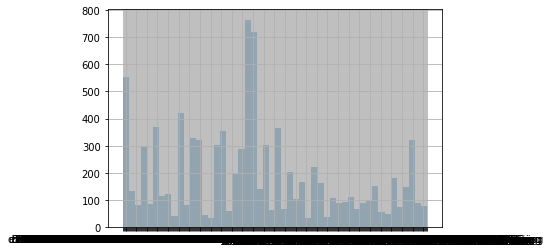

In [ ]:
# распределение оленей по фотографиям
bboxes_df['filename'][bboxes_df['class_label_reindeer'] ==1].hist(bins=50)

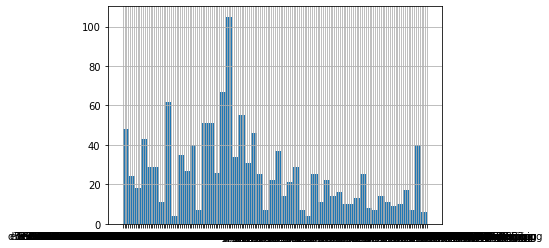

In [ ]:
# распределение оленят по фотографиям
bboxes_df['filename'][bboxes_df['class_label_fawn'] ==1].hist(bins=50)